In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [2]:
df_ma_5_days = yf.download('MA', start ='2015-01-01')
df_v_5_days = yf.download('V', start ='2015-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
df_ma_5_days.columns =['Close', 'High', 'Low', 'Open', 'Volume']
df_v_5_days.columns =['Close', 'High', 'Low', 'Open', 'Volume']

In [7]:
combined_df = pd.concat([df_ma_5_days[['Open', 'Close']], df_v_5_days[['Open', 'Close']]], axis=1, keys=['MA', 'V'])
combined_df = combined_df.ffill()
combined_df.columns = ['MA_Open', 'MA_Close', 'V_Open', 'V_Close']

In [9]:
combined_df

,MA_Open,MA_Close,V_Open,V_Close
Date,,,,
2015-01-02,81.386285,80.447357,61.394389,61.776672
2015-01-05,80.081179,78.184540,61.419993,60.412998
2015-01-06,78.550737,78.015541,60.557537,60.023731
2015-01-07,79.116219,79.229111,60.242858,60.827946
2015-01-08,80.141601,80.461449,61.352406,61.643784
...,...,...,...,...
2025-01-21,527.659973,528.059998,320.309998,323.630005
2025-01-22,528.000000,527.179993,324.769989,323.559998
2025-01-23,529.049988,534.219971,323.760010,328.209991


In [11]:
p1 = combined_df['MA_Close']
p2 = combined_df['V_Close']

In [13]:
score, p_value, _ = coint(p1,p2)

In [15]:
p_value

0.00012374183240625598

In [19]:
# Calculate delta for a 5 day period:

Text(0.5, 1.0, 'Spread between MA and V')

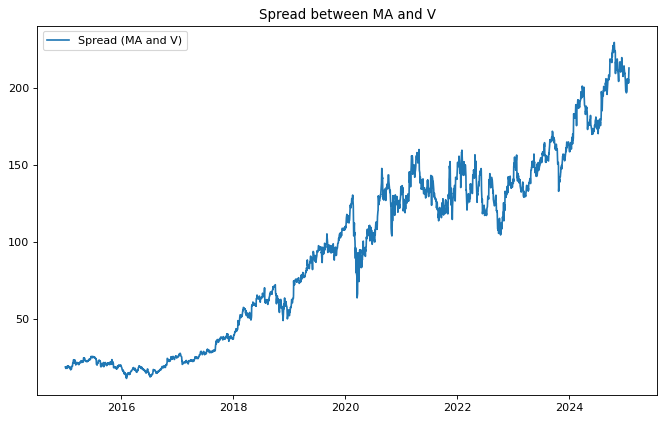

In [17]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(combined_df.MA_Close - combined_df.V_Close, label = 'Spread (MA and V)')
plt.legend()
plt.title("Spread between MA and V")

In [21]:
# Add a constant to the independent variable (V)
X = sm.add_constant(p2)

In [23]:
model = sm.OLS(p1, X)
results = model.fit()

In [25]:
delta = results.params[1]

/var/folders/xc/tw7x6_8n0z30jr8_7fy3crgc0000gn/T/ipykernel_23361/3723922462.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  delta = results.params[1]


In [27]:
delta

1.8285084108735965

In [29]:
spread = combined_df.MA_Close - delta * combined_df.V_Close

In [31]:
historical_mean_spread = np.mean(spread)

In [33]:
historical_mean_spread

-42.15113347897334

In [35]:
current_spread = combined_df['MA_Close'].iloc[-1] - delta * combined_df['V_Close'].iloc[-1]

In [37]:
current_spread

-70.28350935674587

In [39]:
historical_mean_spread - current_spread

28.132375877772525

In [41]:
spread

Date
2015-01-02   -32.511744
2015-01-05   -32.281171
2015-01-06   -31.738379
2015-01-07   -31.995289
2015-01-08   -32.254757
                ...    
2025-01-17   -59.727837
2025-01-21   -63.700188
2025-01-22   -64.452184
2025-01-23   -65.914759
2025-01-24   -70.283509
Length: 2531, dtype: float64

In [43]:
# Mu = d1_mean_spread
d1_mean_spread = np.mean(spread)

In [45]:
current_spread = combined_df['MA_Close'].iloc[-1] - delta * combined_df['V_Close'].iloc[-1]

In [47]:
d1_mean_spread - current_spread

28.132375877772525

In [49]:
mu = d1_mean_spread

In [51]:
# Sigma = standard_deviation_spread
standard_deviation_spread = np.std(spread)

In [53]:
sigma = standard_deviation_spread

In [61]:
sigma

9.448496003819193

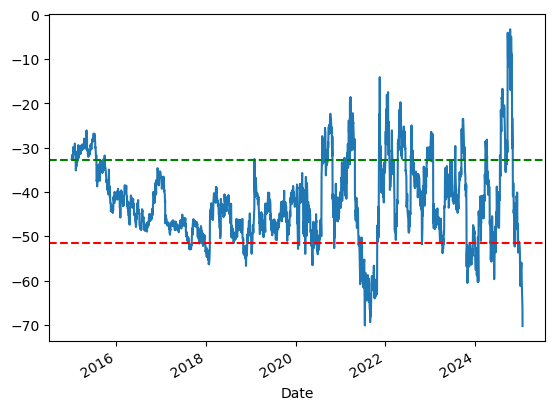

In [57]:
spread.plot()
plt.axhline(mu + sigma, color='g', linestyle='--', label=f"𝜇 + 𝜎 = {mu + sigma:.3f}")
plt.axhline(mu - sigma, color='r', linestyle='--', label=f"𝜇 - 𝜎 = {mu - sigma:.3f}")

In [62]:
# Go long MA, short V